In [1]:
import pandas as pd
import folium
import sqlite3
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [152]:
!pip install geopy matplotlib ipython

In [2]:
from geopy.geocoders import Nominatim
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import display


In [3]:
conn = sqlite3.connect('yelp.db')

In [4]:
tables = pd.read_sql_query("SELECT name FROM sqlite_master WHERE TYPE='table'",conn)

In [5]:
tables

,name
0,business
1,checkin
2,review
3,tip
4,user


In [6]:
pd.read_sql_query("select count(*) from business",conn)

,count(*)
0,451038


In [7]:
for table in tables['name']:
    display(pd.read_sql_query(f"select * from {table} limit 5",conn))

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3.0,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5.0,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3.0,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5.0,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4.0,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


,user_id,business_id,text,date,compliment_count
0,AGNUgVwnZUey3gcPCJ76iw,3uLgwr0qeCNMjKenHJwPGQ,Avengers time with the ladies.,2012-05-18 02:17:21,0
1,NBN4MgHP9D3cw--SnauTkA,QoezRbYQncpRqyrLH6Iqjg,They have lots of good deserts and tasty cuban...,2013-02-05 18:35:10,0
2,-copOvldyKh1qr-vzkDEvw,MYoRNLb5chwjQe3c_k37Gg,It's open even when you think it isn't,2013-08-18 00:56:08,0
3,FjMQVZjSqY8syIO-53KFKw,hV-bABTK-glh5wj31ps_Jw,Very decent fried chicken,2017-06-27 23:05:38,0
4,ld0AperBXk1h6UbqmM80zw,_uN0OudeJ3Zl_tf6nxg5ww,Appetizers.. platter special for lunch,2012-10-06 19:43:09,0


,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [8]:
business_id= pd.read_sql_query("""
    SELECT business_id, review_count
    FROM business
    WHERE LOWER(categories) LIKE '%restaurant%' AND is_open = 1
""", conn)

In [9]:
business_id

,business_id,review_count
0,MTSW4McQd7CbVtyjqoe9mw,80
1,CF33F8-E6oudUQ46HnavjQ,6
2,bBDDEgkFA1Otx9Lfe7BZUQ,10
3,eEOYSgkmpB90uNA7lDOMRA,10
4,il_Ro8jwPlHresjw9EGmBg,28
...,...,...
105007,w_4xUt-1AyY2ZwKtnjW0Xg,998
105008,l9eLGG9ZKpLJzboZq-9LRQ,11
105009,cM6V90ExQD6KMSU3rRB5ZA,33
105010,WnT9NIzQgLlILjPT0kEcsQ,35


In [10]:
pd.read_sql_query(f"""
    SELECT 
        AVG(review_count) AS average_review_count,
        MIN(review_count) AS min_review_count,
        MAX(review_count) AS max_review_count,
        (SELECT AVG(review_count)
         FROM (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*)/ 2 FROM business))
         ) AS median_review_count
    FROM 
        business
        WHERE business_id IN {tuple(business_id['business_id'])};
""",conn)

,average_review_count,min_review_count,max_review_count,median_review_count
0,104.097789,5,7568,15.0


In [11]:
def remove_outliers(df, col):
    q1= df[col].quantile(0.25)
    q3= df[col].quantile(0.75)
    iqr= q3-q1
    lower_bound = q1 -1.5 * iqr
    upper_bound = q3 +1.5 * iqr
    df =df[(df[col]>= lower_bound) & (df[col]<= upper_bound)]
    return df

In [12]:
business_id = remove_outliers(business_id, 'review_count')

In [13]:
business_id.shape

(94611, 2)

In [14]:
pd.read_sql_query(f"""
    SELECT 
        AVG(review_count) AS average_review_count,
        MIN(review_count) AS min_review_count,
        MAX(review_count) AS max_review_count,
        (SELECT AVG(review_count)
         FROM (SELECT review_count FROM business ORDER BY review_count LIMIT 1 OFFSET (SELECT COUNT(*)/ 2 FROM business))
         ) AS median_review_count,
         
        AVG(stars) AS average_star_rating,
        MIN(stars) AS min_star_rating,
        MAX(stars) AS max_star_rating,
        (SELECT AVG(stars)
         FROM (SELECT review_count FROM business ORDER BY stars LIMIT 1 OFFSET (SELECT COUNT(*)/ 2 FROM business))
         ) AS median_star_rating
    FROM 
        business
        WHERE business_id IN {tuple(business_id['business_id'])};
""",conn).transpose()

,0
average_review_count,55.975426
min_review_count,5.000000
max_review_count,248.000000
median_review_count,15.000000
average_star_rating,3.477281
min_star_rating,1.000000
max_star_rating,5.000000
median_star_rating,3.477281


In [15]:
# Which restaurants have the highest number of reviews?
pd.read_sql_query(f"""
    SELECT 
        name,
        SUM(review_count) AS review_count,
        AVG(stars) AS avg_rating
    FROM 
        business
    WHERE 
        business_id IN {tuple(business_id['business_id'])}
    GROUP BY 
        name
    ORDER BY 
        review_count DESC
    LIMIT 10;
    """, conn)

,name,review_count,avg_rating
0,McDonald's,49470,1.868702
1,Chipotle Mexican Grill,27213,2.381757
2,Taco Bell,24051,2.141813
3,Chick-fil-A,23061,3.377419
4,First Watch,20283,3.875000
5,Panera Bread,19839,2.661905
6,Buffalo Wild Wings,19449,2.344828
7,Domino's Pizza,18273,2.290210
8,Wendy's,17790,2.030159
9,Chili's,17232,2.514706


In [16]:
# Which restaurants have the highest ratings ?
pd.read_sql_query(f"""
    SELECT 
        name,
        SUM(review_count) AS review_count,
        AVG(stars) AS avg_rating
    FROM 
        business
    WHERE 
        business_id IN {tuple(business_id['business_id'])}
    GROUP BY 
        name
    ORDER BY 
        avg_rating DESC
    LIMIT 10;
    """, conn)

,name,review_count,avg_rating
0,ā café,144,5.0
1,two birds cafe,231,5.0
2,the brewers cabinet production,39,5.0
3,taqueria la cañada,51,5.0
4,la bamba,132,5.0
5,la 5th av tacos,72,5.0
6,el sabor mexican and chinese food,63,5.0
7,eat.drink.Om...YOGA CAFE,21,5.0
8,d4 Tabletop Gaming Cafe,24,5.0
9,cabbage vegetarian cafe,36,5.0


In [17]:
# Do restaurants with higher engagement tend to have higher rating ?
pd.read_sql_query("""
    SELECT business_id,
    SUM(length(date)-length(replace(date,',',''))+1) AS checkin_count
    FROM checkin
    GROUP BY business_id""",conn)

,business_id,checkin_count
0,---kPU91CF4Lq2-WlRu9Lw,33
1,--0iUa4sNDFiZFrAdIWhZQ,30
2,--30_8IhuyMHbSOcNWd6DQ,6
3,--7PUidqRWpRSpXebiyxTg,30
4,--7jw19RH9JKXgFohspgQw,78
...,...,...
131925,zznJox6-nmXlGYNWgTDwQQ,201
131926,zznZqH9CiAznbkV6fXyHWA,3
131927,zzu6_r3DxBJuXcjnOYVdTw,69
131928,zzw66H6hVjXQEt0Js3Mo4A,6


In [18]:
pd.read_sql_query("""
    SELECT business_id, COUNT(*) AS tip_count
    FROM tip
    GROUP BY business_id""",conn)

,business_id,tip_count
0,---kPU91CF4Lq2-WlRu9Lw,8
1,--0iUa4sNDFiZFrAdIWhZQ,12
2,--30_8IhuyMHbSOcNWd6DQ,2
3,--7PUidqRWpRSpXebiyxTg,6
4,--8IbOsAAxjKRoYsBFL-PA,8
...,...,...
106188,zzjCxn89a7RQo8keIOO_Ag,2
106189,zzjFdJwXuxBOGe9JeY_EMw,4
106190,zznJox6-nmXlGYNWgTDwQQ,12
106191,zzu6_r3DxBJuXcjnOYVdTw,4


In [19]:
review_count_df = pd.read_sql_query(f"""
    SELECT 
        total.avg_rating as rating,
        AVG(total.review_count) as avg_review_count, 
        AVG(total.checkin_count) as avg_checkin_count, 
        AVG(total.tip_count) as avg_tip_count
    FROM
        (SELECT
            b.business_id,
            SUM(b.review_count) AS review_count,
            AVG(b.stars) AS avg_rating,
            SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
            SUM(tip.tip_count) as tip_count
        FROM
            business b
        LEFT JOIN
            checkin cc ON b.business_id = cc.business_id
        LEFT JOIN
            (SELECT business_id, count(business_id) as tip_count from tip GROUP BY business_id ORDER BY tip_count) as tip on b.business_id = tip.business_id 
        WHERE 
            b.business_id IN {tuple(business_id['business_id'])}
        GROUP BY
            b.business_id) as total
    GROUP BY 
        total.avg_rating
""", conn)


In [20]:
review_count_df

,rating,avg_review_count,avg_checkin_count,avg_tip_count
0,1.0,124.079365,157.662651,49.260504
1,1.5,216.778894,310.328720,69.731194
2,2.0,248.477958,471.478632,82.325348
3,2.5,328.939472,714.144861,113.741766
4,3.0,431.887038,953.733642,149.342740
5,3.5,573.100468,1132.035317,185.711293
6,4.0,657.775629,1144.251672,203.858783
7,4.5,586.820542,775.598442,161.814136
8,5.0,277.006178,247.906015,76.470893


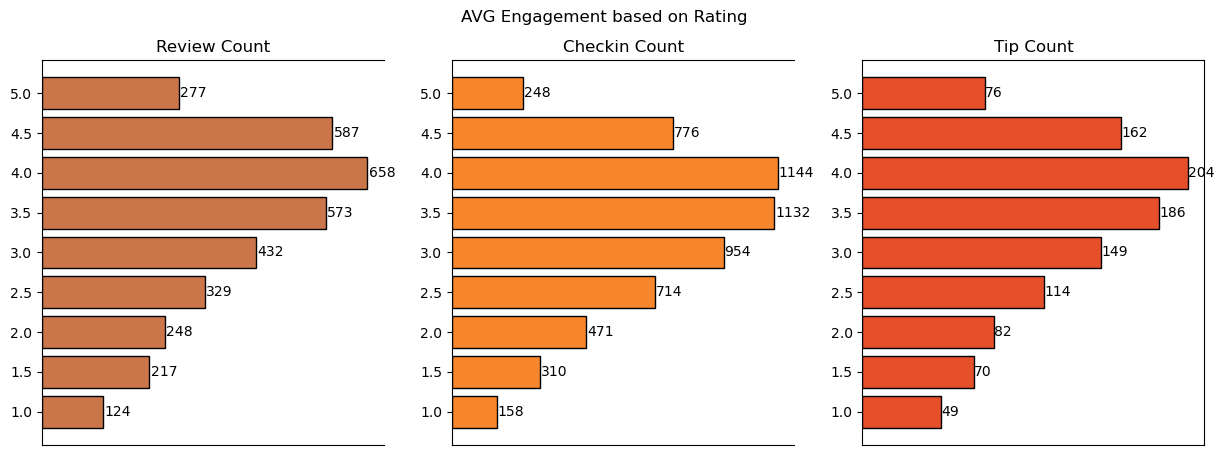

In [21]:
plt.figure(figsize=(15,5))
plt.suptitle('AVG Engagement based on Rating\n\n')
plt.yticks([])
plt.xticks([])
plt.subplot(1,3,1)
plt.title('Review Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_review_count'], edgecolor='k', color = '#CB754B')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df ['avg_review_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')
plt.xticks([])
plt.subplot(1,3,2)
plt.title('Checkin Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_checkin_count'], edgecolor = 'k', color = '#F8862C')
plt.gca().spines['right'].set_visible(False)
for i, value in enumerate(review_count_df ['avg_checkin_count']):
    plt.text(value+3, i, str(round(value)), color='black', va='center')
plt.xticks([])
plt.subplot(1,3,3)
plt.title('Tip Count')
plt.barh(review_count_df ['rating'].astype('str'), review_count_df ['avg_tip_count'], edgecolor = 'k',color='#E54F29')
for i, value in enumerate (review_count_df ['avg_tip_count']):
    plt.text(value+0.05, i, str(round(value)), color='black', va='center')
plt.xticks([])
plt.show()

In [22]:
engagement_df = pd.read_sql_query(f"""
    SELECT
    b.business_id,
    SUM(b.review_count) AS review_count,
    AVG(b.stars) AS avg_rating,
    SUM(LENGTH(cc.date) - LENGTH(REPLACE(cc.date, ',', '')) + 1) AS checkin_count,
    SUM(tip.tip_count) as tip_count,
    (CASE WHEN b.stars >= 3.5 THEN 'High-Rated' ELSE 'Low-Rated' END) as category
FROM
    business b
LEFT JOIN
    checkin cc ON b.business_id = cc.business_id
LEFT JOIN
    (SELECT business_id, count(business_id) as tip_count from tip GROUP BY business_id) as tip on b.business_id = tip.business_id 
WHERE 
    b.business_id IN {tuple(business_id['business_id'])}
GROUP BY
    b.business_id
""", conn).dropna()


In [23]:
engagement_df[['review_count','checkin_count','tip_count']].corr()

,review_count,checkin_count,tip_count
review_count,1.000000,0.626884,0.766321
checkin_count,0.626884,1.000000,0.772088
tip_count,0.766321,0.772088,1.000000


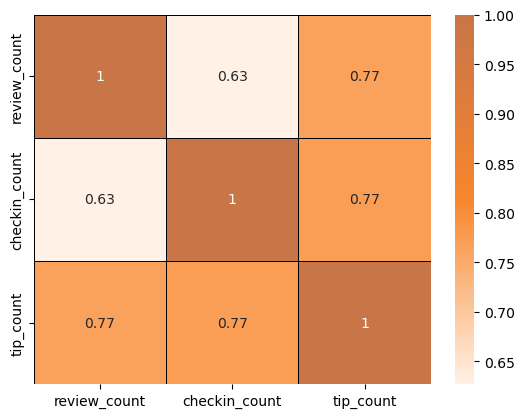

In [24]:
colors = ["#FFF1E5", "#F8862C", "#C87548"]
custom_cmap = LinearSegmentedColormap.from_list("mycmap", colors)

sns.heatmap(engagement_df[['review_count', 'checkin_count', 'tip_count']].corr(), cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')
plt.show()

In [25]:
# Is there any difference between user engagement (revies,checkins,tips) between high rated and low rated business?
engagement_df.groupby("category")[['review_count','checkin_count','tip_count']].mean()

,review_count,checkin_count,tip_count
category,,,
High-Rated,650.619554,1098.599770,182.929797
Low-Rated,379.110781,799.927456,117.750398


In [26]:
# function to calculate the success score based on the avg rating and total review count
def calculate_success_metric(df):
    success_score = []
    for index, row in df.iterrows():
        score = row['avg_rating'] * np.log(row['review_count'] + 1)
        success_score.append(score)
    return success_score

In [27]:
#How do the success metrics (review_count or avg_rating) of restaurants vary across different states and cities? 
city_df = pd.read_sql_query(f"""select city, state, latitude, longitude, AVG(stars) as avg_rating, SUM(review_count) as review_count,
count(*) as restaurant_count
from business
WHERE business_id IN {tuple (business_id['business_id'])}
group by state, city
order by review_count desc
limit 10 """, conn)

city_df['success_score'] = calculate_success_metric(city_df)

In [28]:
city_df

,city,state,latitude,longitude,avg_rating,review_count,restaurant_count,success_score
0,Philadelphia,PA,39.955505,-75.155564,3.532156,526461,9003,46.532391
1,Tampa,FL,27.890814,-82.502346,3.571429,313128,5145,45.194180
2,Indianapolis,IN,39.637133,-86.127217,3.412111,277917,5103,42.771083
3,Tucson,AZ,32.338572,-111.010760,3.386187,274839,4257,42.408423
4,Nashville,TN,36.208102,-86.768170,3.493590,261210,4212,43.575838
5,New Orleans,LA,29.963974,-90.042604,3.693676,207717,3036,45.225134
6,Saint Louis,MO,38.583223,-90.407187,3.414303,154470,2433,40.793282
7,Reno,NV,39.476518,-119.784037,3.479626,145179,1767,41.357900
8,Edmonton,AB,53.436403,-113.604288,3.509379,137748,4638,41.527144
9,Boise,ID,43.611192,-116.206275,3.558824,108312,1683,41.256660


In [29]:
# Create a base map
m = folium.Map(location=[city_df['latitude'].mean(), city_df['longitude'].mean()], zoom_start=4)

# Define a color scale
color_scale = folium.LinearColormap(colors=['green', 'yellow', '#E54F29'],
                                     vmin=city_df['success_score'].min(), 
                                     vmax=city_df['success_score'].max())

# Add markers to the map
for index, row in city_df.iterrows():
    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=5,
        color=color_scale(row['success_score']),
        fill=True,
        fill_color=color_scale(row['success_score']),
        fill_opacity=0.7,
        popup=f"Success Score: {row['success_score']}"
    ).add_to(m)

# Add color scale to the map
m.add_child(color_scale)


In [30]:
## Are there any patterns in user engagement over time ?
## Are there any seasonal trends in user engagememt ?

high_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM (SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple (business_id['business_id'])} and stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple (business_id['business_id'])} and b.stars >= 3.5
GROUP BY month_year
ORDER BY month_year) as tip
on review.month_year = tip.month_year ;""", conn)

In [31]:
low_rated_engagement = pd.read_sql_query(f"""
SELECT review.month_year, review.review_count, tip.tip_count FROM (SELECT strftime('%m-%Y', date) AS month_year, COUNT(*) AS review_count
FROM review
WHERE business_id IN {tuple (business_id['business_id'])} and stars < 3.5
GROUP BY month_year
ORDER BY month_year) as review
JOIN
(SELECT AVG(b.stars), strftime('%m-%Y', tip.date) AS month_year, COUNT(*) AS tip_count
FROM tip
JOIN business as b
on tip.business_id = b.business_id
WHERE tip.business_id IN {tuple(business_id['business_id'])} and b.stars < 3.5
GROUP BY month_year
ORDER BY month_year) as tip
on review.month_year = tip.month_year ;""", conn)

In [32]:
high_rated_engagement

,month_year,review_count,tip_count
0,01-2010,2436,474
1,01-2011,4342,3726
2,01-2012,6172,7926
3,01-2013,7602,7380
4,01-2014,9946,8142
...,...,...,...
149,12-2017,20322,8862
150,12-2018,25740,6978
151,12-2019,27512,6966
152,12-2020,22588,5622


In [33]:
low_rated_engagement

,month_year,review_count,tip_count
0,01-2010,1226,150
1,01-2011,2206,1782
2,01-2012,3496,3228
3,01-2013,4392,3288
4,01-2014,5538,3642
...,...,...,...
149,12-2017,11940,2646
150,12-2018,15148,2028
151,12-2019,15182,1650
152,12-2020,10028,888


In [34]:
time_rating = pd.read_sql_query(f""" SELECT strftime('%m-%Y', date) as month_year, AVG(stars) as avg_rating
FROM review
WHERE business_id IN {tuple (business_id['business_id'])}
GROUP BY month_year
ORDER BY month_year
;""", conn)

In [35]:
time_rating

,month_year,avg_rating
0,01-2006,4.000000
1,01-2007,3.897436
2,01-2008,3.603960
3,01-2009,3.690661
4,01-2010,3.724194
...,...,...
198,12-2017,3.613415
199,12-2018,3.608687
200,12-2019,3.665246
201,12-2020,3.833701


In [36]:
time_rating['month_year'] = pd.to_datetime(time_rating['month_year'])
time_rating.sort_values('month_year', inplace = True)
time_rating = time_rating[time_rating['month_year']>'2017']
high_rated_engagement['month_year'] = pd.to_datetime(high_rated_engagement ['month_year'])
high_rated_engagement.sort_values('month_year', inplace = True)
high_rated_engagement = high_rated_engagement [high_rated_engagement ['month_year']>'2017']
low_rated_engagement['month_year'] = pd.to_datetime(low_rated_engagement['month_year'])
low_rated_engagement.sort_values('month_year', inplace = True)
low_rated_engagement = low_rated_engagement [low_rated_engagement['month_year']>'2017']

In [37]:
high_rated_engagement['avg_rating'] = time_rating['avg_rating'].values

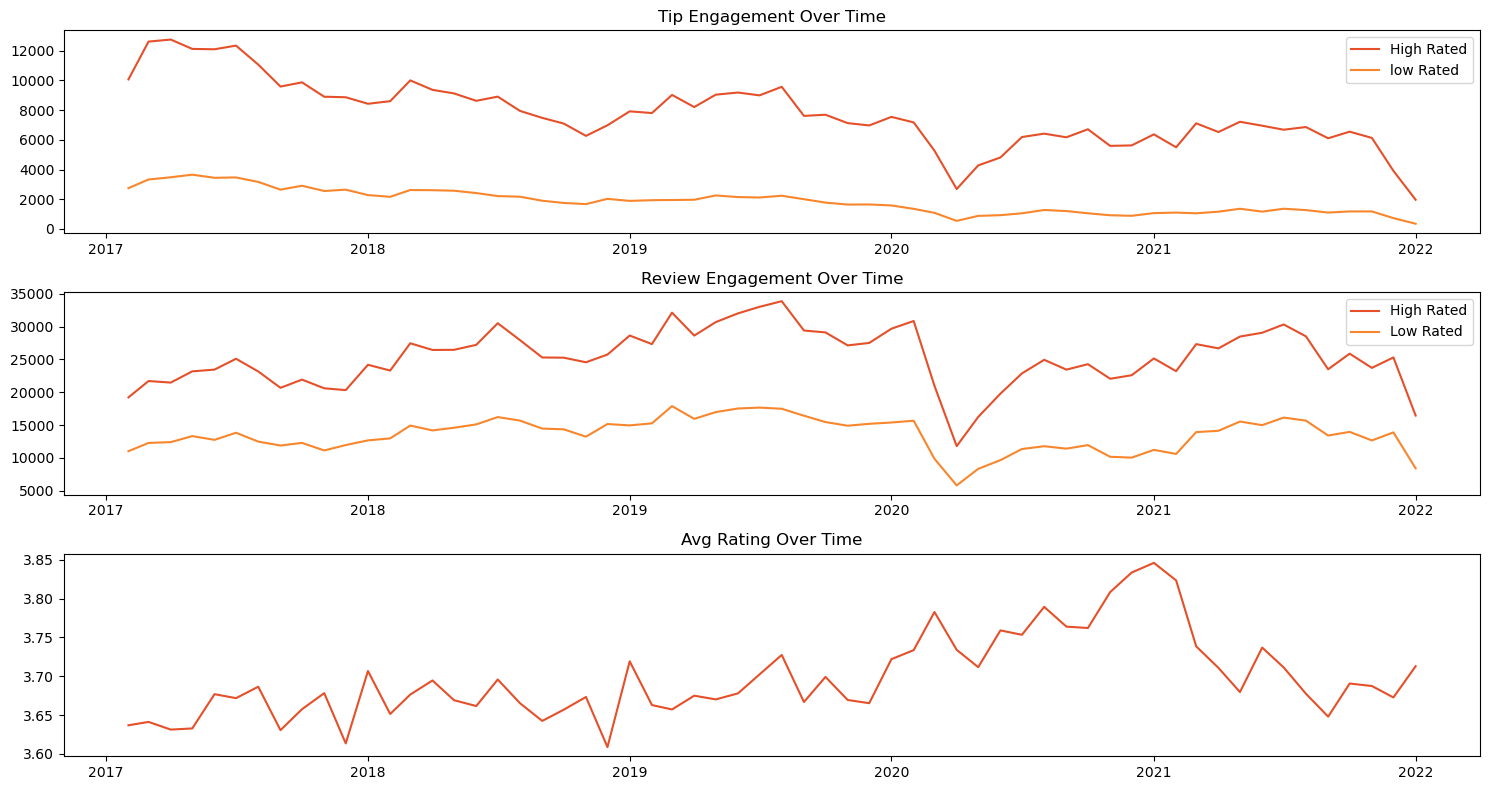

In [38]:
plt.figure(figsize = (15,8))
plt.subplot(3,1,1)
plt.title('Tip Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['tip_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement ['tip_count'], label = 'low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,2)
plt.title('Review Engagement Over Time')
plt.plot(high_rated_engagement['month_year'], high_rated_engagement['review_count'], label = 'High Rated', color = '#E54F29')
plt.plot(low_rated_engagement['month_year'], low_rated_engagement['review_count'] , label = 'Low Rated', color = '#F8862C')
plt.legend()
plt.subplot(3,1,3)
plt.title('Avg Rating Over Time')
plt.plot(time_rating['month_year'],time_rating['avg_rating'], color = '#E54F29')
plt.tight_layout()
plt.show()

In [39]:
tip_high_rated = high_rated_engagement [['month_year','tip_count']].set_index('month_year')
review_high_rated = high_rated_engagement [['month_year', 'review_count']].set_index('month_year')
rating_df = time_rating [['month_year','avg_rating']].set_index('month_year')

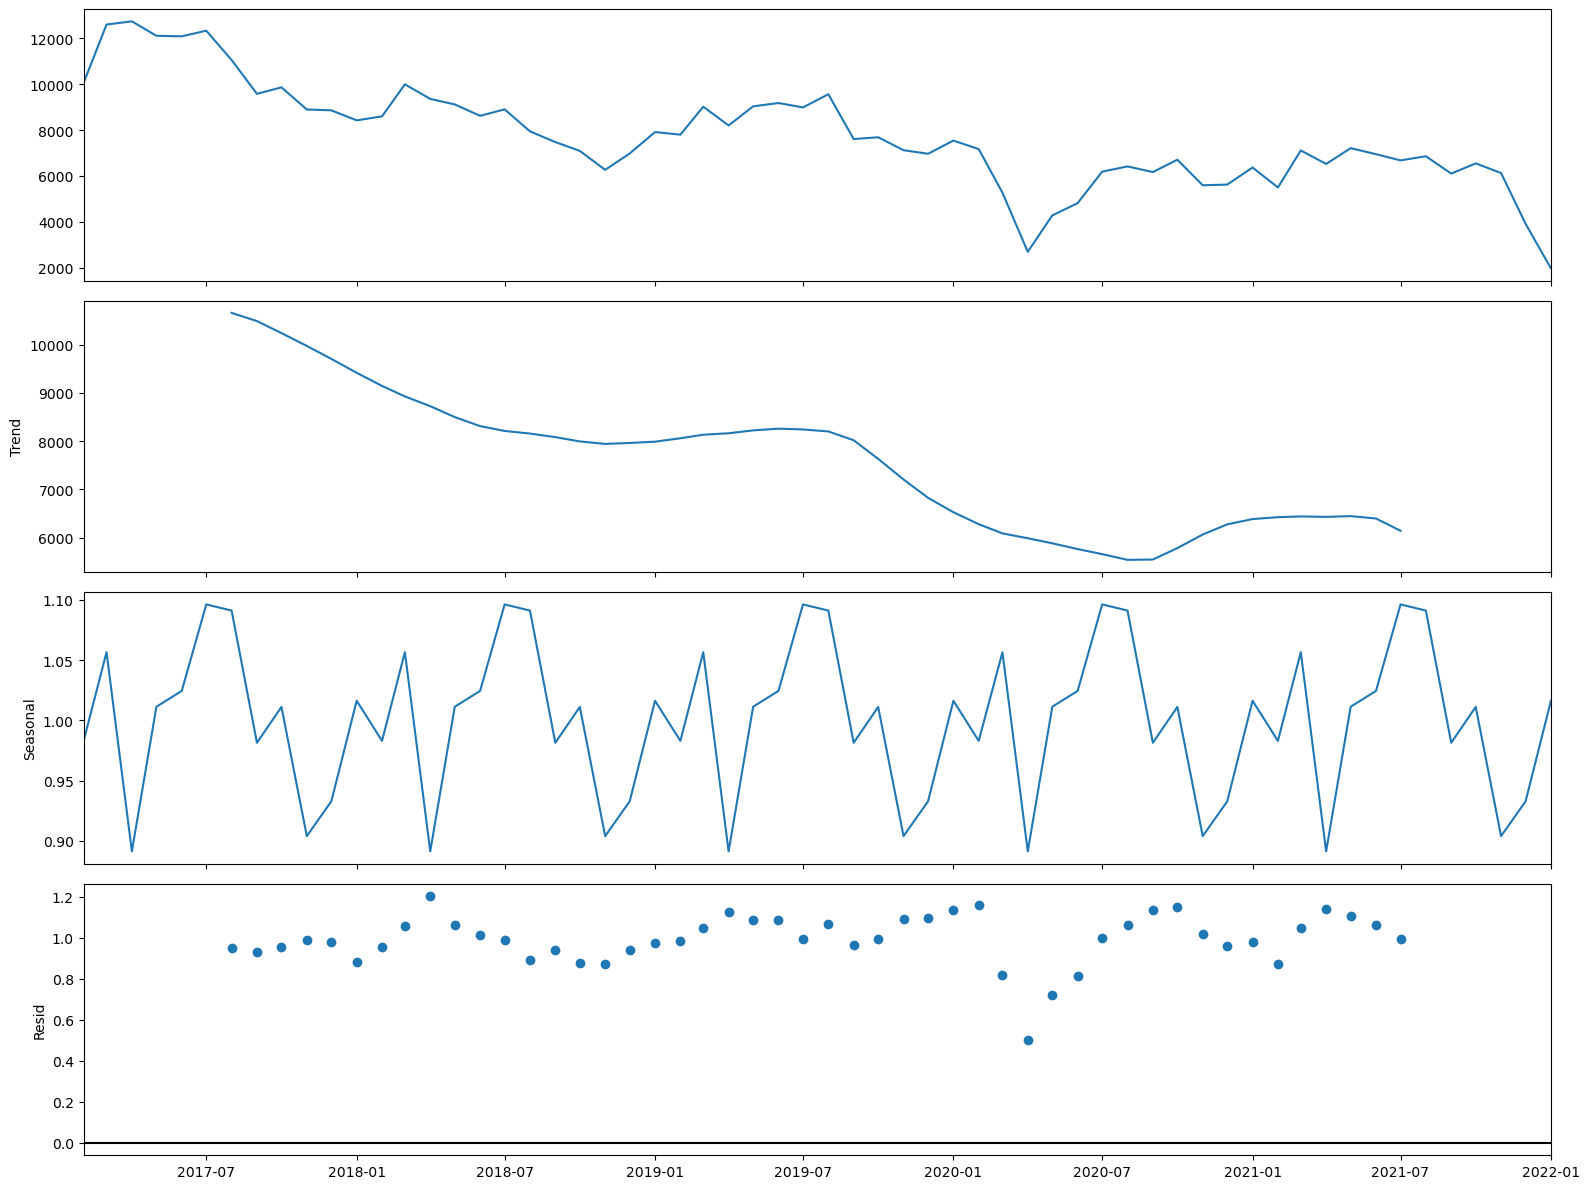

In [40]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(tip_high_rated,
model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

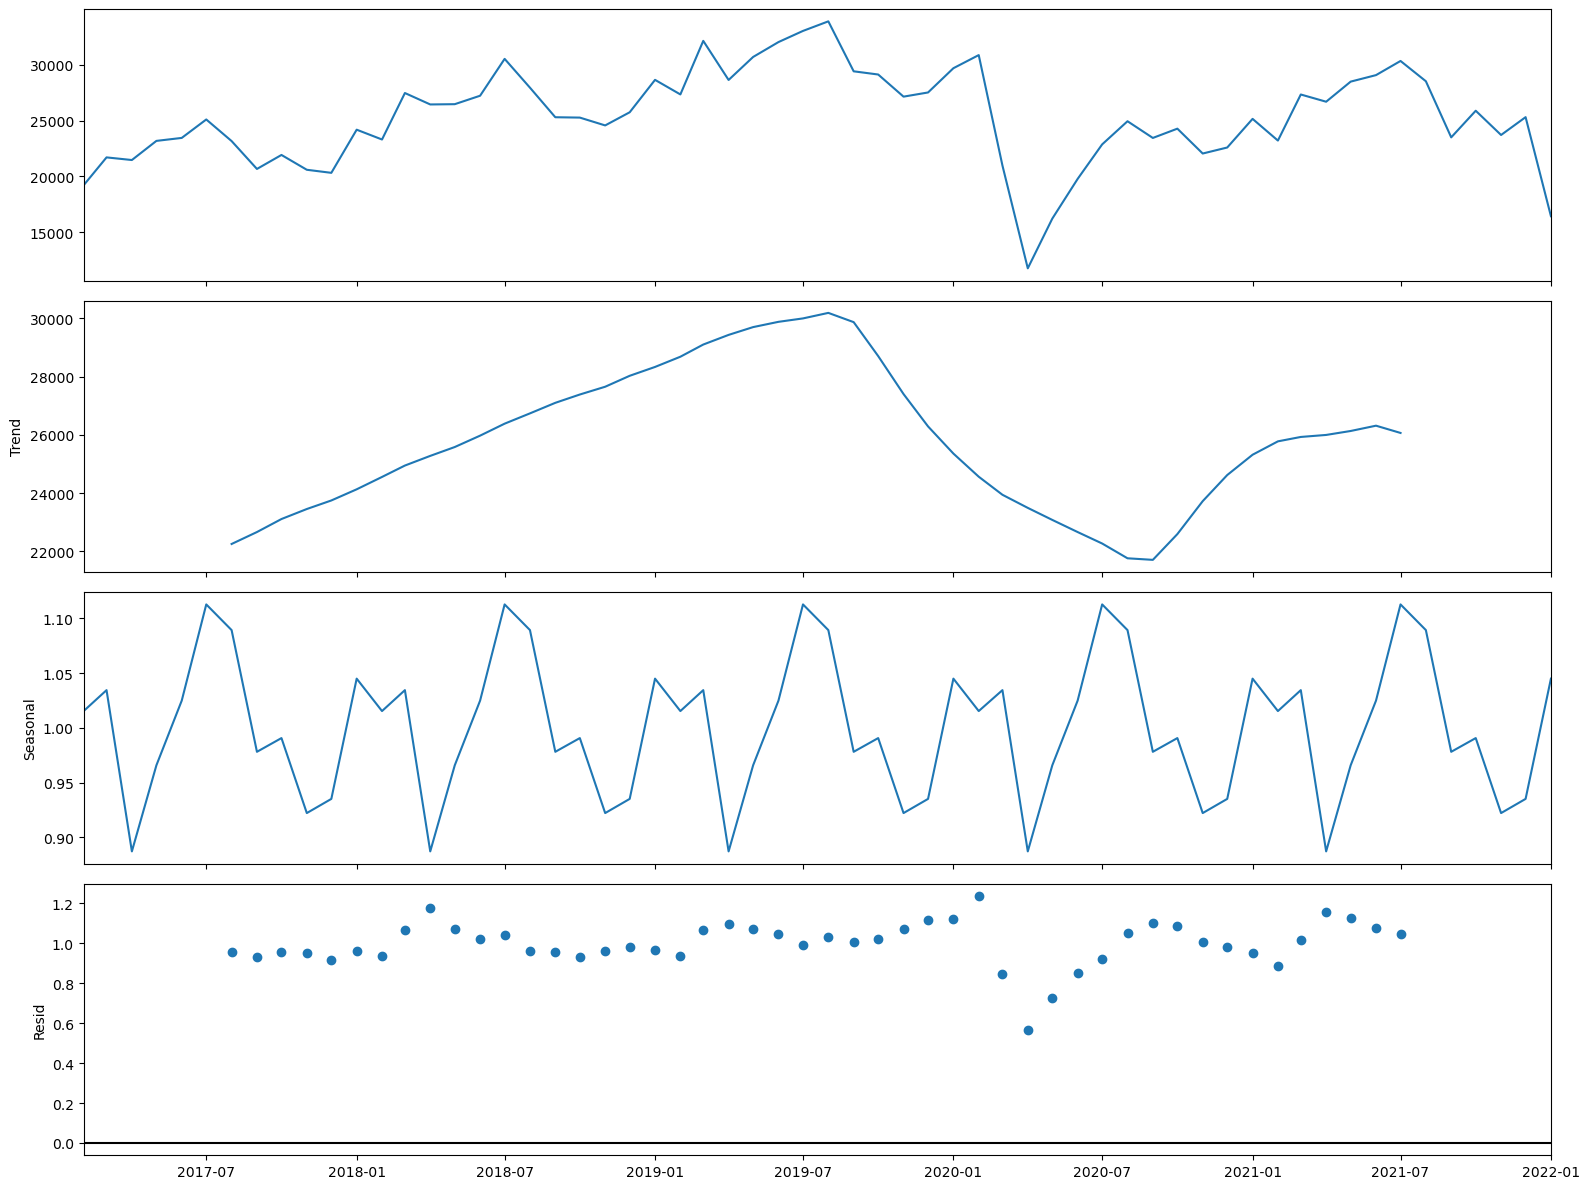

In [41]:
from statsmodels.tsa.seasonal import seasonal_decompose
multiplicative_decomposition = seasonal_decompose(review_high_rated,
model='multiplicative', period = 12)
plt.rcParams.update({'figure.figsize': (16,12)})
multiplicative_decomposition.plot()
plt.show()

In [42]:
#How does the sentiment of reviews and tips (useful, funny, cool) correlate with the success metrics of restaurants?
sentiment_df = pd.read_sql_query(f"""SELECT b.business_id, AVG(b.stars) as avg_rating, SUM(b.review_count) as review_count,
SUM(s.useful_count) as useful_count,
SUM(s.funny_count) as funny_count,
SUM(s.cool_count) as cool_count
FROM
(SELECT business_id,
SUM(useful) as useful_count,
SUM(funny) as funny_count,
SUM(cool) as cool_count
FROM
review
GROUP BY business_id) as s
JOIN business as b on b.business_id = s.business_id
WHERE b.business_id IN {tuple (business_id['business_id'])
GROUP BY b.business_id ORDER BY review_count""", conn)

sentiment_df = remove_outliers (sentiment_df, 'review_count')
sentiment_df = remove_outliers (sentiment_df, 'useful_count')
sentiment_df = remove_outliers (sentiment_df, 'funny_count')
sentiment_df = remove_outliers (sentiment_df, 'cool_count')

SyntaxError: f-string: expecting '}' (451200595.py, line 16)

In [ ]:
sentiment_df

In [ ]:
sentiment_df ['success_score'] = calculate_success_metric(sentiment_df)

In [ ]:
sns.heatmap(sentiment_df.iloc[:, 2:].corr(), cmap=custom_cmap, annot=True, linewidths=0.5, linecolor='black')
plt.show()

In [ ]:
#Is there any difference in engagement of elite users and non elite users? 
elite_df = pd.read_sql_query("""SELECT
elite,
COUNT(*) as num_users, 
SUM(review_count) AS total_review_count
FROM
    (SELECT
        CASE
            WHEN elite = '' THEN 'Not Elite'
            ELSE 'Elite'
        END AS elite,
        u.review_count
    FROM
        user u) AS user_elite
GROUP BY
    elite;
""", conn)

In [ ]:
elite_df

In [ ]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
plt.title('User Distribution')
plt.pie(elite_df ['num_users'], labels =  elite_df['elite'], autopct='%.2f', startangle = 180, colors = ['#E54F29', '#F8862C'])
plt.subplot(1,2,2)
plt.title('Review Distribution')
plt.pie(elite_df ['total_review_count'], labels = elite_df['elite'], autopct='%.2f', startangle = 90, colors = ['#E54F29','#F8862C'])
plt.show()

In [ ]:
#What are the busiest hours for restaurants?
review_engagement = pd.read_sql_query("""SELECT 
cast (strftime('%H',date) as integer)
as hour,
COUNT(*) AS review_count
FROM
review
GROUP BY
hour;
""",conn)
tip_engagement = pd.read_sql_query("""SELECT 
cast (strftime('%H',date) as integer)
as hour,
COUNT(*) AS tip_count
FROM
tip
GROUP BY
hour;
""", conn)
checkin = pd.read_sql_query("""SELECT date FROM checkin""", conn)
checkin_engagement = []
for i in checkin ['date']:
    checkin_engagement.extend([datetime.strptime(j.strip(),"%Y-%m-%d %H:%M:%S").strftime("%H") for j in i.split(',')])
checkin_engagement = pd.DataFrame(checkin_engagement).astype('int').groupby(0) [[0]].count()

In [ ]:
plt.figure(figsize = (10,6))
plt.subplot(3,1,1)
plt.title('Tip Engagement')
plt.bar(tip_engagement ['hour'], tip_engagement['tip_count'], color = '#E54F29')
plt.subplot(3,1,2)
plt.title('Review Engagement')
plt.bar(review_engagement['hour'], review_engagement['review_count'], color='#F8862C')
plt.subplot(3,1,3)
plt.title('Checkin Engagement')
plt.bar(checkin_engagement.index, checkin_engagement[0], color = '#CB754B')
plt.tight_layout()
plt.show()